# LAT Data Latency History

#### Including trending of outliers: long-timescales

In [1]:
from astropy.table import Table, Column
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import (WEEKLY, MONTHLY, YEARLY, DateFormatter, rrulewrapper, RRuleLocator, drange)
import datetime as dt
plt.rc('font', size = 20)
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)

In [2]:
# Just put all the variables here, so we don't have to hunt for them
Year_Qtr = "2019_Q4" # used to name output figures
basedir = "/Users/jeggen/ISOC/2019_Q4/" # this is where you keep the source data file and store output figures
datafile = basedir+"datetimes.20200122" # make this with dates.pl
startYMD = (2019,10,1)
endYMD = (2020,1,1)
axisLimits = 2019.75,2020.0

In [3]:
print "Output figures will be named:"
print "Latency history:",basedir+Year_Qtr+"_latency_history.png"
print "Latency history histogram:",basedir+Year_Qtr+"_latency_per_run_histogram.png"

Output figures will be named:
Latency history: /Users/jeggen/ISOC/2019_Q4/2019_Q4_latency_history.png
Latency history histogram: /Users/jeggen/ISOC/2019_Q4/2019_Q4_latency_per_run_histogram.png


In [4]:
# read regular ASCII tabular files of data

file = datafile
f = Table.read(file, format = 'ascii')
ymd = f['YMD']
hms = f['HMS']
fy = f['FYear'] # - 2000
slact = f['SLAC']
nasat = f['NASA']
tott = f['TOTAL']

In [5]:
# specify the time range for the histograms and time-history plot of LAT data processing latency

ylen = float(format(dt.datetime(startYMD[0],12,31), '%j'))
doy = float(format(dt.datetime(startYMD[0],startYMD[1],startYMD[2]), '%j'))-1
startFY = startYMD[0]+doy/ylen
ylen = float(format(dt.datetime(endYMD[0],12,31), '%j'))
doy = float(format(dt.datetime(endYMD[0],endYMD[1],endYMD[2]), '%j'))-1
endFY = endYMD[0]+doy/ylen
(startFY,endFY)

(2019.7479452054795, 2020.0)

In [6]:
# extract the data to be used in the time history plot
ok = (fy > startFY)

ymd = ymd[ok]
hms = hms[ok]
slact = slact[ok]
nasat = nasat[ok]
tott = tott[ok]
fy = fy[ok]
dnt = [dt.datetime.strptime(ymd[i]+hms[i],"%Y-%m-%d%H:%M:%S") for i in range(len(ymd))]

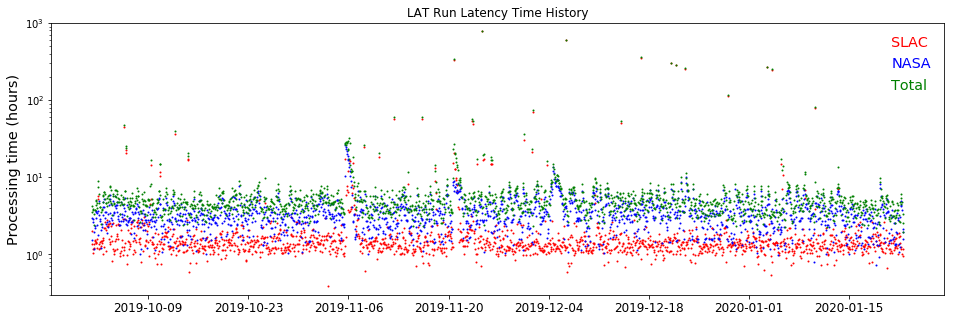

In [7]:
def color_legend_texts(leg):
    """Color legend texts based on color of corresponding lines"""
    for line, txt in zip(leg.get_lines(), leg.get_texts()):
        txt.set_color(line.get_color())  

fig, ax = plt.subplots(figsize = [16,5])

ax = plt.gca() # get the current axes
ax.set_ylim(.3,1000)
ax.plot_date(dnt, slact, '.',color='r',label='SLAC',markersize=2)
ax.plot_date(dnt, nasat, '.', color='b',label='NASA',markersize=2)
ax.plot_date(dnt, tott, '.',color='g',label='Total',markersize=2)
plt.ylabel("Processing time (hours)",fontsize='x-large')
plt.title("LAT Run Latency Time History")
plt.yscale('log')

xax = ax.get_xaxis() # get the x-axis
adf = xax.get_major_formatter() # the auto-formatter
plt.setp( ax.xaxis.get_majorticklabels(), rotation=0,fontsize='large' )

legend = ax.legend(loc='upper right', fontsize='x-large', markerscale = 0,frameon = 0)
color_legend_texts(legend)

adf.scaled[1./24] = '%H:%M:%S'  # set the < 1day x-axis scale to H:M
adf.scaled[1.0] = '%Y-%m-%d' # set the > 1day < 1m x-axis scale to Y-m-d
adf.scaled[30.] = '%Y-%m-%d' # set the > 1month < 1Y x-axis scale to Y-m
adf.scaled[365.] = '%Y' # set the > 1year x-axis scale to Y

plt.draw()
plt.savefig(basedir+Year_Qtr+"_latency_history.png")

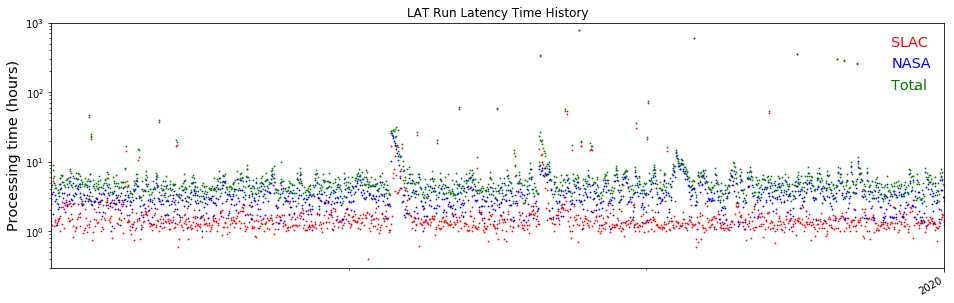

In [8]:
majorLocator = MultipleLocator(1)
#majorFormatter = FormatStrFormatter('%d')
minorLocator = AutoMinorLocator(12)

def color_legend_texts(leg):
    """Color legend texts based on color of corresponding lines"""
    for line, txt in zip(leg.get_lines(), leg.get_texts()):
        txt.set_color(line.get_color())  

fig = plt.figure(figsize = [16,5])
ax = fig.add_subplot(111)
ax.set_xlim(axisLimits)
ax.set_ylim(.3,1000)
ax.xaxis.set_major_locator(majorLocator)
ax.xaxis.set_minor_locator(minorLocator)
ax.plot(fy, slact, '.',color='r',label='SLAC',markersize=1.6)
ax.plot(fy, nasat, '.', color='b',label='NASA',markersize=1.6)
ax.plot(fy, tott, '.',color='g',label='Total',markersize=1.6)
#ax.minorticks_on()
#plt.xlabel("Year",fontsize='medium')
plt.ylabel("Processing time (hours)",fontsize='x-large')
plt.title("LAT Run Latency Time History")
plt.yscale('log')
plt.gcf().autofmt_xdate()
legend = ax.legend(loc='upper right', fontsize='x-large', markerscale = 0,frameon = 0)
color_legend_texts(legend)

plt.show()

In [9]:
# extract the data to be used in the histograms
ok = (fy < endFY)

ymd = ymd[ok]
hms = hms[ok]
slact = slact[ok]
nasat = nasat[ok]
tott = tott[ok]
fy = fy[ok]
dnt = [dt.datetime.strptime(ymd[i]+hms[i],"%Y-%m-%d%H:%M:%S") for i in range(len(ymd))]

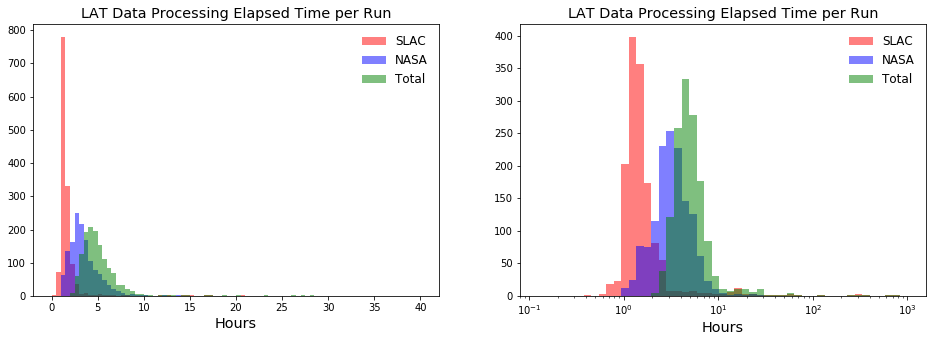

<Figure size 432x288 with 0 Axes>

In [10]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = [16,5])

# first histogram using linear time bins
#minorLocator1 = AutoMinorLocator(10)
#ax1.yaxis.set_minor_locator(minorLocator1)
ax1.hist(slact,color='r',label='SLAC',range = (0,40),bins=80,alpha=0.5)
ax1.hist(nasat, color='b',label='NASA',range = (0,40),bins=80,alpha=0.5)
ax1.hist(tott,color='g',label='Total',range = (0,40),bins=80,alpha=0.5)
ax1.set_xlabel("Hours",fontsize='x-large')
ax1.set_title("LAT Data Processing Elapsed Time per Run",fontsize='x-large')
legend = ax1.legend(loc='upper right', fontsize='large', markerscale = 0.1,frameon = 0)

# first histogram using log time bins
binarr = 10**(np.linspace(-30,100)*0.03)
ax2.hist(slact,color='r',label='SLAC',bins=binarr,alpha=0.5)
ax2.hist(nasat, color='b',label='NASA',bins=binarr,alpha=0.5)
ax2.hist(tott,color='g',label='Total',bins=binarr,alpha=0.5)
plt.xlabel("Hours",fontsize='x-large')
ax2.set_title("LAT Data Processing Elapsed Time per Run",fontsize='x-large')
plt.xscale('log')
legend = ax2.legend(loc='upper right', fontsize='large',frameon = 0)
plt.draw()
plt.savefig(basedir+Year_Qtr+"_latency_per_run_histogram.png")